In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [97]:
df = pd.read_csv('all.csv')
df['efficiency'] = df['attack'] / df['exchange']
df_no_braid = df[df['group'] != 'Braid3' and df['group'] != 'Braid4' and df['group'] != 'Braid5']

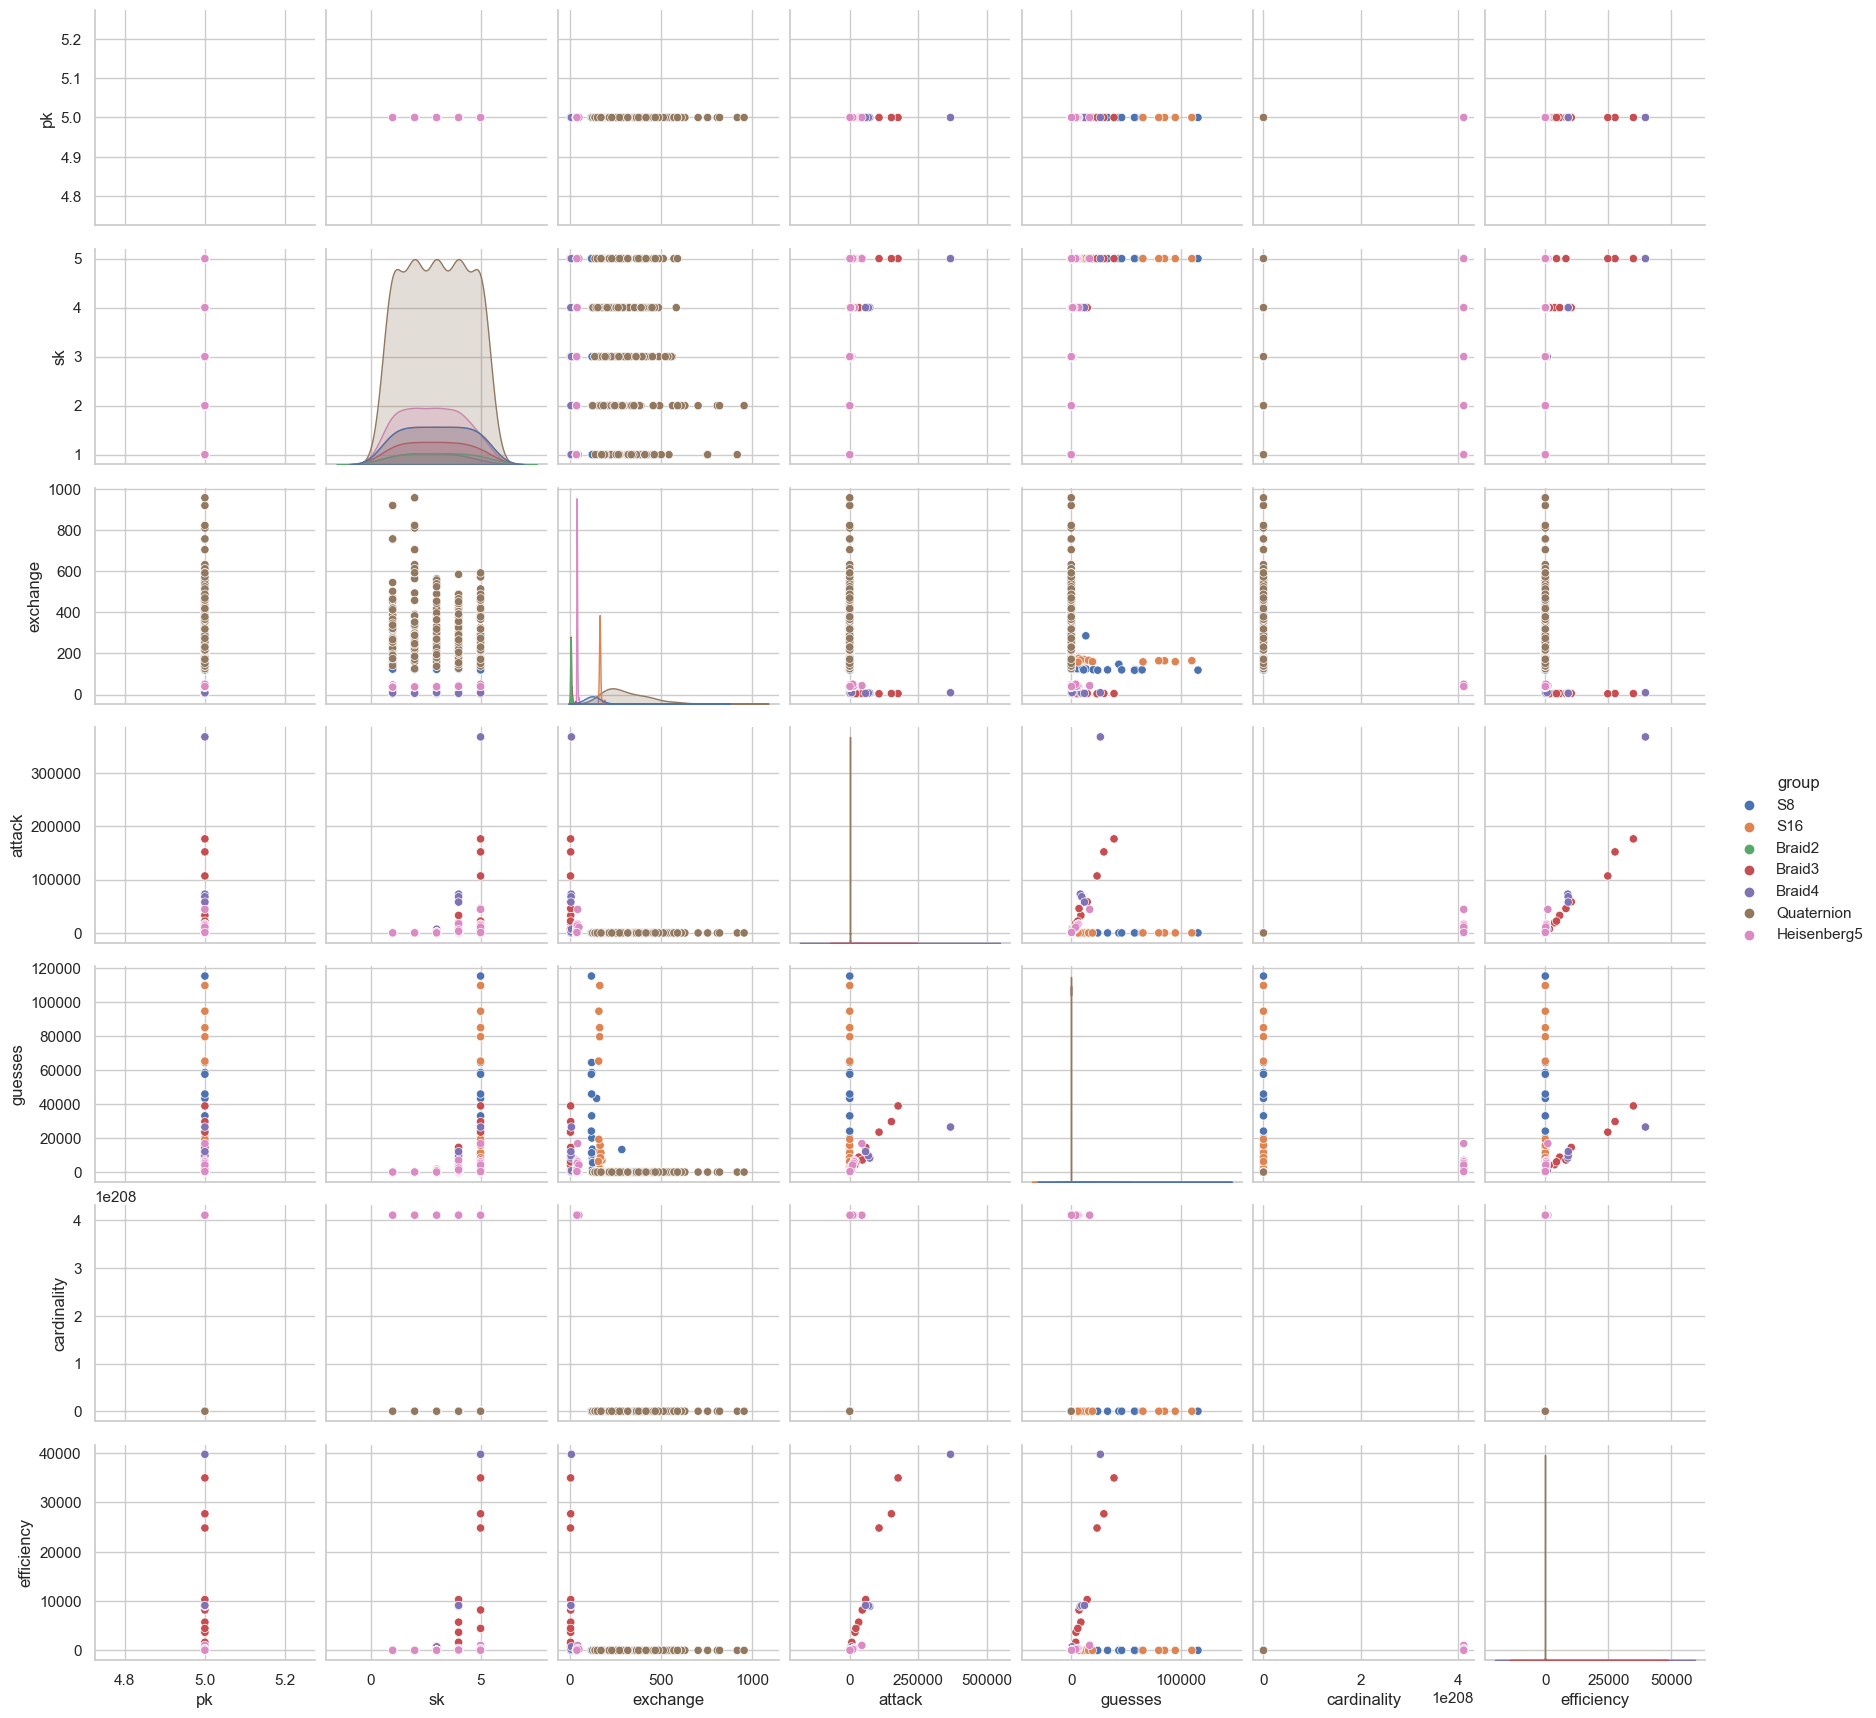

In [90]:
sns.set_theme(style="whitegrid")
gfg = sns.pairplot(data=df[df['sk'] <= 5], hue='group')
plt.show()

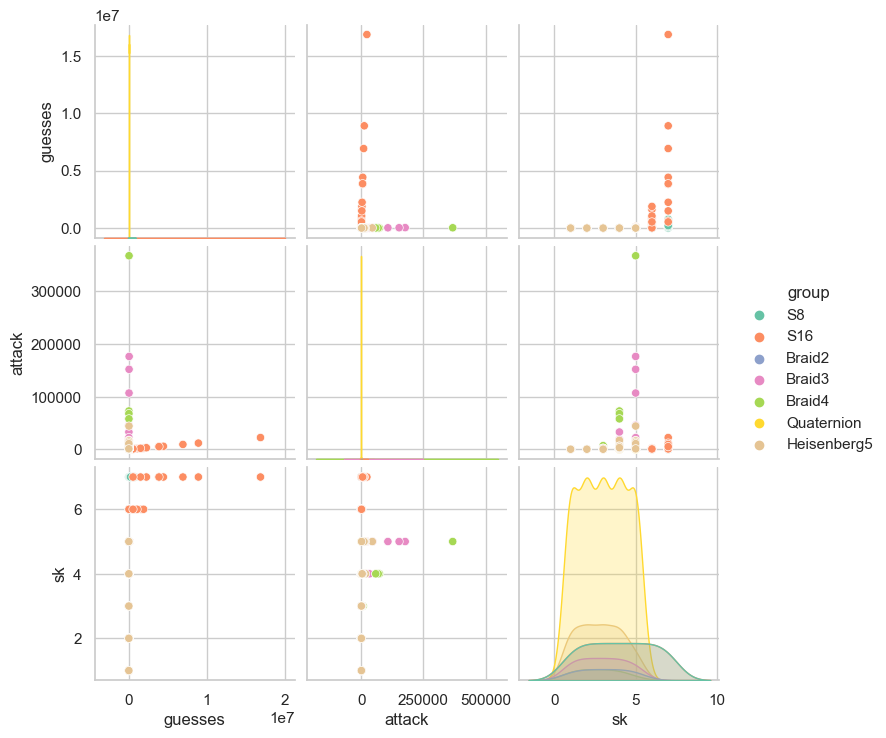

In [91]:
sns.set_theme(style="whitegrid")
gfg = sns.pairplot(data=df, hue='group', vars=['guesses', 'attack', 'sk'], palette='Set2')
plt.show()

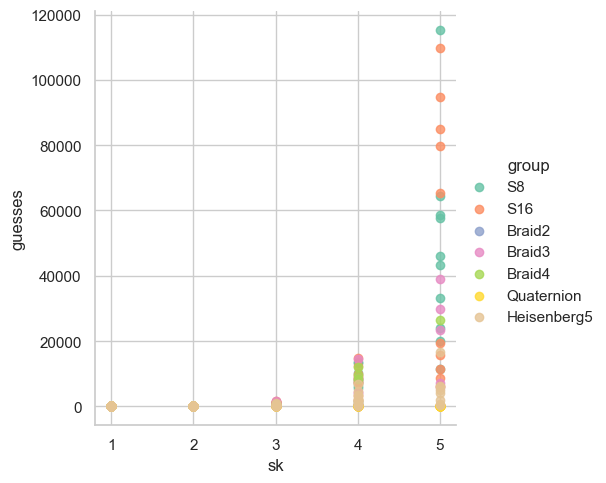

In [92]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df[df['sk']<=5], x='sk', y='guesses', hue='group', palette='Set2', fit_reg=False)

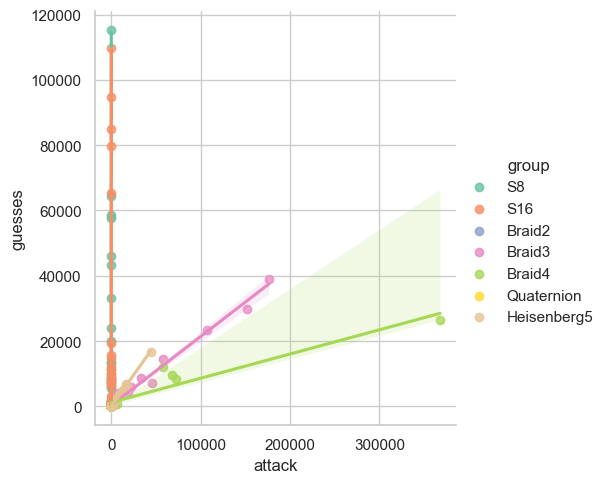

In [98]:
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df_no_braid[df_no_braid['sk']<=5], x='attack', y='guesses', hue='group', palette='Set2', fit_reg=True)

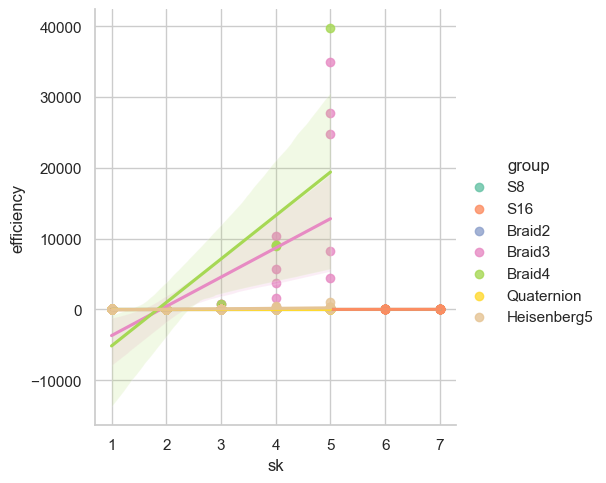

In [94]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df, x='sk', y='efficiency', hue='group', palette='Set2')

/opt/homebrew/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


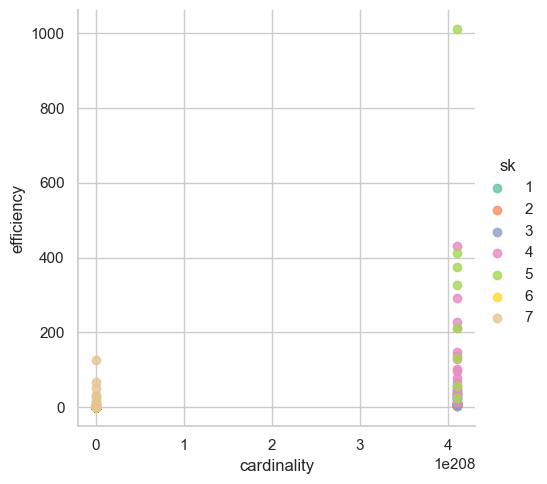

In [95]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df, x='cardinality', y='efficiency', hue='sk', palette='Set2')

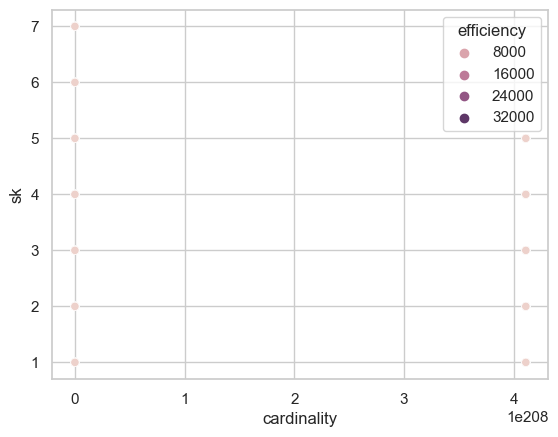

In [96]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
df['efficiency'] = df['attack'] / df['exchange']
gfg = sns.scatterplot(data=df, x='cardinality', y='sk', hue='efficiency')